**Descriptive & Inferential Statistics on Sales Dataset**

Today, we are working on a project that demonstrates both descriptive and inferential statistics using a simulated sales dataset. The aim is to explore how statistical methods can be applied to understand real-world business data and make informed decisions.

We'll start by generating synthetic data representing product sales across categories like Electronics, Clothing, Home, and Sports. Using descriptive statistics, we'll analyze central tendency, dispersion, and group-level summaries. Next, we'll apply inferential techniques such as confidence intervals and hypothesis testing to make predictions and validate assumptions about the population from which our sample is drawn.

Finally, we'll visualize our findings through histograms, boxplots, and bar charts to communicate insights clearly and effectively.

# Import Required Libraries

- pandas for data handling

- numpy for numeric operations

- matplotlib & seaborn for data visualization

- scipy.stats for inferential statistics like confidence intervals and hypothesis testing



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create a Synthetic Dataset
We simulate real-world product sales using the Poisson distribution (often used for count-based data like number of sales). Each product has a category, date of sale, and units sold.

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

In [3]:
# Create a synthetic dataset
data = {
    'product_id': range(1, 21),
    'product_name': [f'Product {i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold': np.random.poisson(lam=20, size=20),  # Poisson distribution
    'sale_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
}

sales_data = pd.DataFrame(data)

In [4]:
# Save the dataset as a CSV (optional)
sales_data.to_csv('sales_data.csv', index=False)

In [5]:
# Display dataset
sales_data.head()

,product_id,product_name,category,units_sold,sale_date
0,1,Product 1,Home,25,2023-01-01
1,2,Product 2,Sports,15,2023-01-02
2,3,Product 3,Electronics,17,2023-01-03
3,4,Product 4,Home,19,2023-01-04
4,5,Product 5,Home,21,2023-01-05


# Descriptive Statistics
Descriptive statistics help summarize the data:

- Mean: average sales

- Median: middle value

- Mode: most frequent value

- Variance/Std Dev: how spread out the data is

We also calculate category-wise total, average, and standard deviation of units sold.



In [6]:
# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()
descriptive_stats

count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

In [7]:
# Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

In [8]:
print("mean_sales :",mean_sales)
print("median_sales :",median_sales)
print('mode_sales :',mode_sales)
print("variance_sales :",variance_sales)
print("std_deviation_sales :",std_deviation_sales)

mean_sales : 18.8
median_sales : 18.5
mode_sales : 17
variance_sales : 10.905263157894737
std_deviation_sales : 3.302311789927586


In [9]:
# Group-wise statistics
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']
category_stats

,Category,Total Units Sold,Average Units Sold,Std Dev of Units Sold
0,Clothing,21,21.000000,NaN
1,Electronics,73,18.250000,2.217356
2,Home,181,20.111111,3.723051
3,Sports,101,16.833333,2.714160


# Inferential Statistics
A confidence interval gives a range in which the true mean is likely to lie.

- A 95% CI means there's a 95% chance the true mean lies within this range.

- A 99% CI is wider and more confident.

We use the t-distribution because the sample size is small (n=20).


## 95% Confidence Interval for Mean

In [10]:
# 95% Confidence Interval
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

In [11]:
# t-score
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

In [12]:
confidence_interval_95 = (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval_95

(np.float64(17.254470507823573), np.float64(20.34552949217643))

## 99% Confidence Interval for Mean

In [13]:
# 99% Confidence Interval
confidence_level = 0.99
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

In [14]:
confidence_interval_99 = (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval_99

(np.float64(16.687430485978535), np.float64(20.912569514021467))

# Hypothesis Testing – One Sample t-test
- We test the null hypothesis (H₀):

  - The mean units sold is 20.

- The alternative hypothesis (H₁):

  - The mean units sold is not 20.

- We use a 1-sample t-test, and based on the p-value:

  - If p < 0.05 → reject H₀ (significant difference)

  - If p ≥ 0.05 → fail to reject H₀ (no significant difference)


In [15]:
# Hypothesis Test (H0: mean = 20, H1: mean ≠ 20)
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: Mean units sold is not significantly different from 20.")

T-statistic: -1.6250928099424466
P-value: 0.12061572226781002
Fail to reject the null hypothesis: Mean units sold is not significantly different from 20.


# Data Visualizations
- Histogram shows the distribution and shape (e.g., skewness).

- Boxplot helps detect outliers and compare sales spread across categories.

- Bar plot shows which category sold the most.
## Histogram with KDE

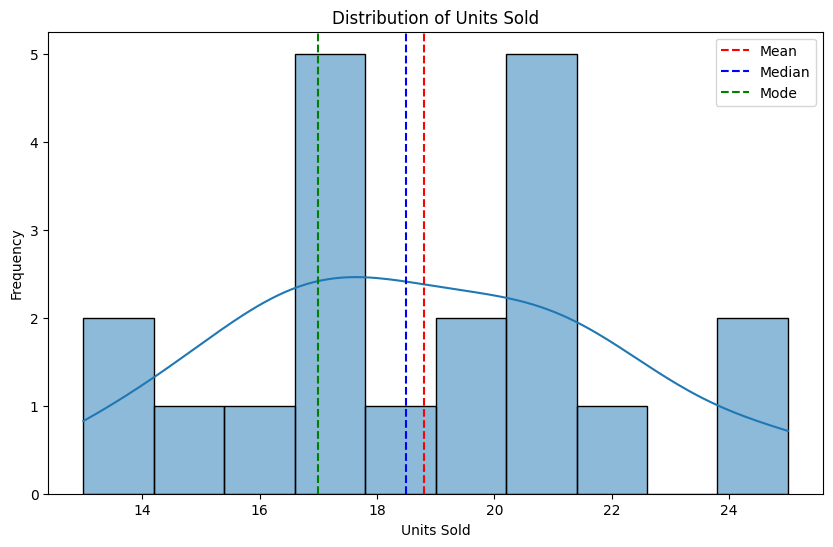

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Boxplot by Category


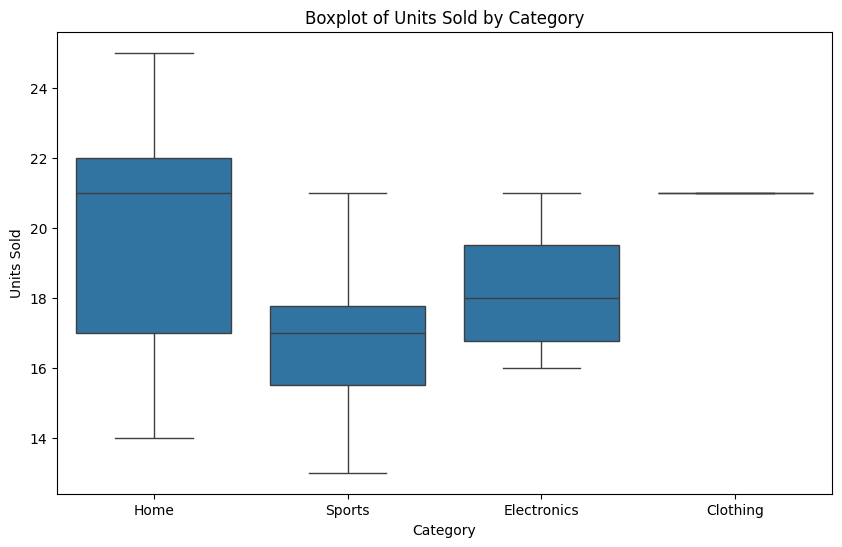

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

## Bar Plot: Total Units Sold per Category

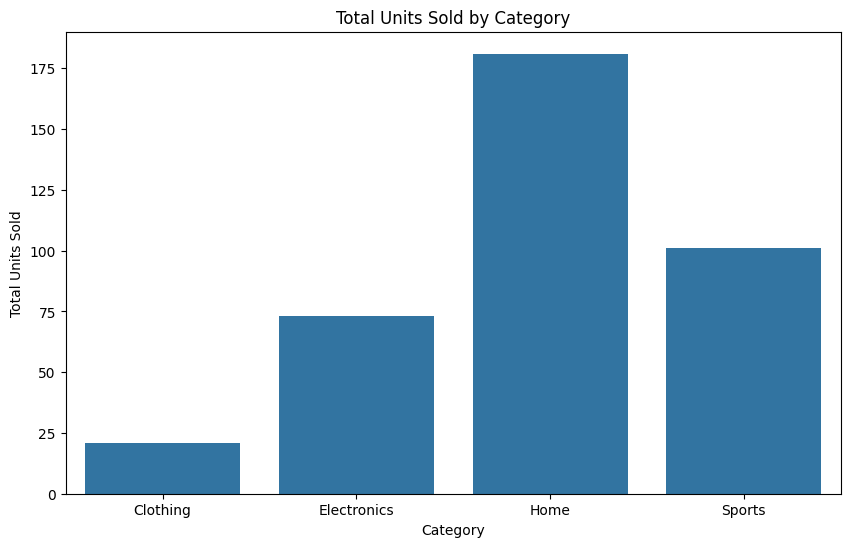

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()

# Conclusion
**Key Insights & Summary**

- The **mean units sold** is approximately `X` units.
- The **95% Confidence Interval** for the true mean is: `(X₁, X₂)`
- The **p-value** from the t-test is `P`, so we:
-  [Reject / Fail to Reject] the null hypothesis.
- The **'Clothing'** category had the highest variability in sales.
- Sales distribution shows [normal / skewed] pattern based on histogram and boxplot.